<a href="https://colab.research.google.com/github/beaamoo/Machine-Learning-Demonstration/blob/main/Naive-Bayes-Classifier-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes Classifier Demonstration with Iris Dataset

In this notebook, the Iris dataset example is reused and a Gaussian Naive Bayes classifier is implemented using pandas, numpy, and scipy.stats libraries. The results are then compared to the Sklearn implementation as a sanity check.

The parameter estimates are obtained using built-in pandas functions, which greatly simplify the implementation but may lead to slightly different results due to the way variances and covariances are calculated (i.e. with or without bias correction).

##Theory

The Naive Bayes classifier is a simple but powerful method for classification. It assumes that the features are conditionally independent given the class label, which simplifies the estimation dramatically. The classifier estimates the class posterior probability using Bayes' rule, and the naive assumption allows for efficient estimation of the class-conditional densities. The classifier is widely used in text classification and other applications where the feature space is high-dimensional. Despite its simplicity and assumptions, the Naive Bayes classifier often performs surprisingly well in practice.

## Continous Features

In Gaussian Naive Bayes, we assume that each feature comes from a class-conditional, univariate Gaussian distribution. Parameters, such as means and variances, are estimated from the data. The objective function for classification is computed by multiplying the Gaussian PDF for each feature given the class, and the prior probability of the class. The class with the highest objective function is predicted.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set()

## Load Dataset

In [2]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})


## Scatter plot visualization

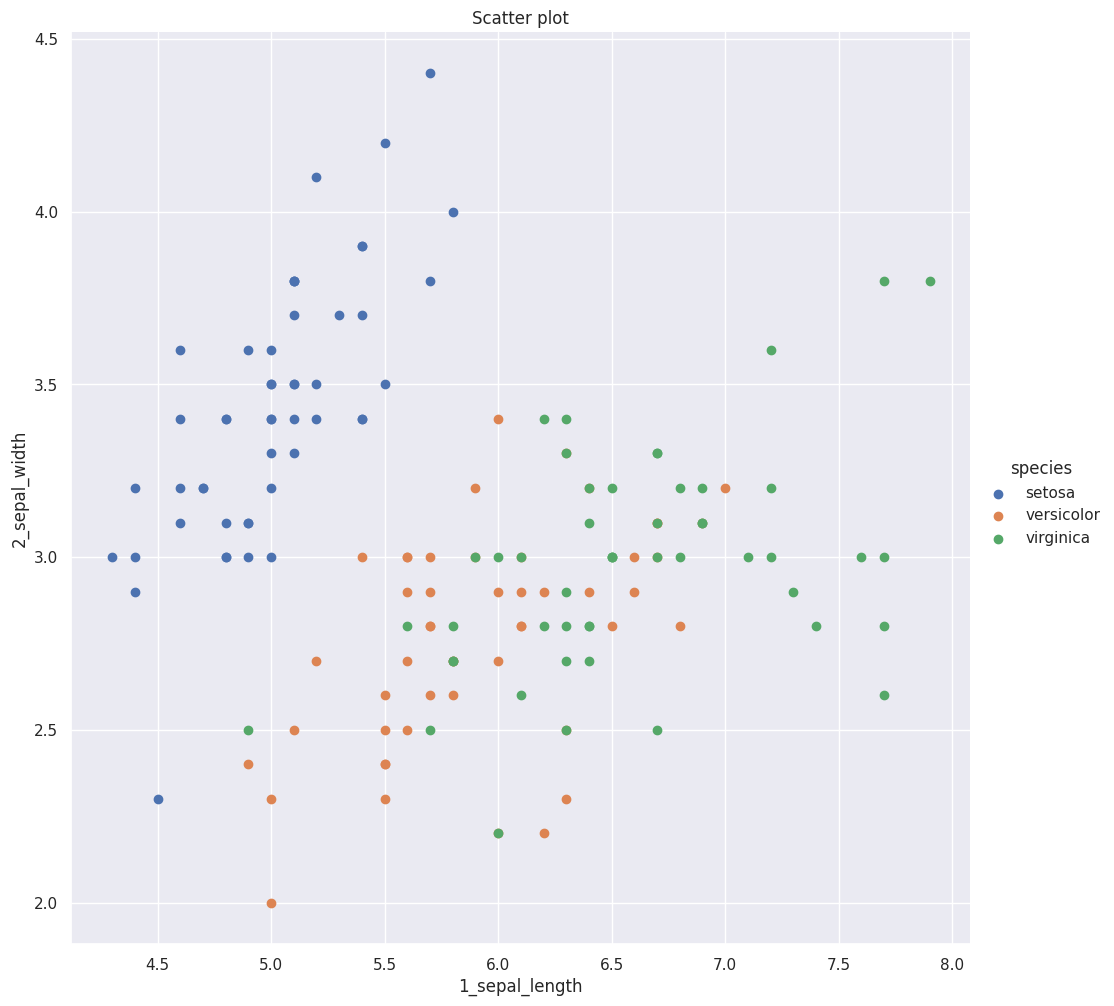

In [3]:
#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=10) .map(plt.scatter,"1_sepal_length", "2_sepal_width", ).add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

## Gaussian Naive Bayes 
Numpy implementation

In [4]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list): 
    #Returns the predicted class from an optimal bayes classifier - distributions must be known
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

## Plotting decision boundaries

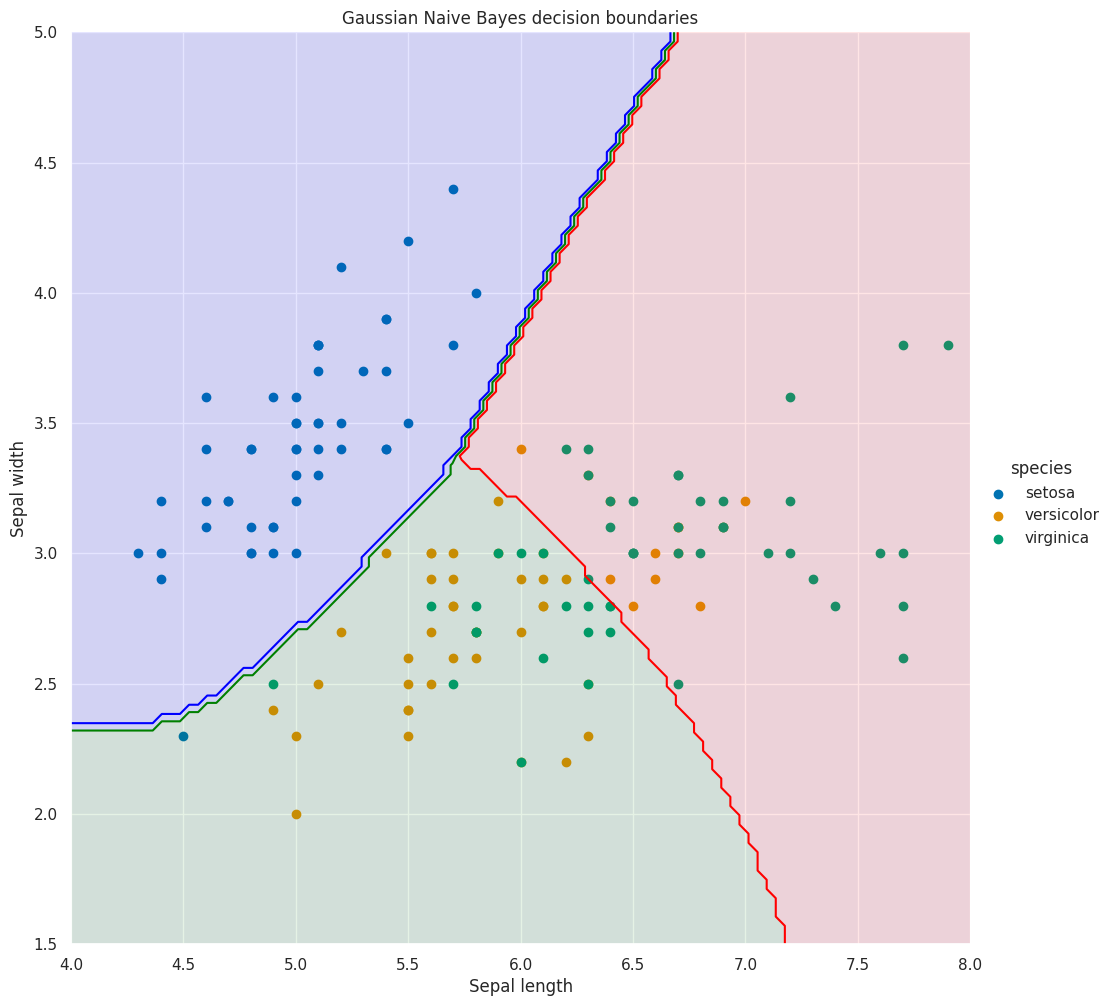

In [5]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

## Gaussian Naive Bayes
Sklearn implementation

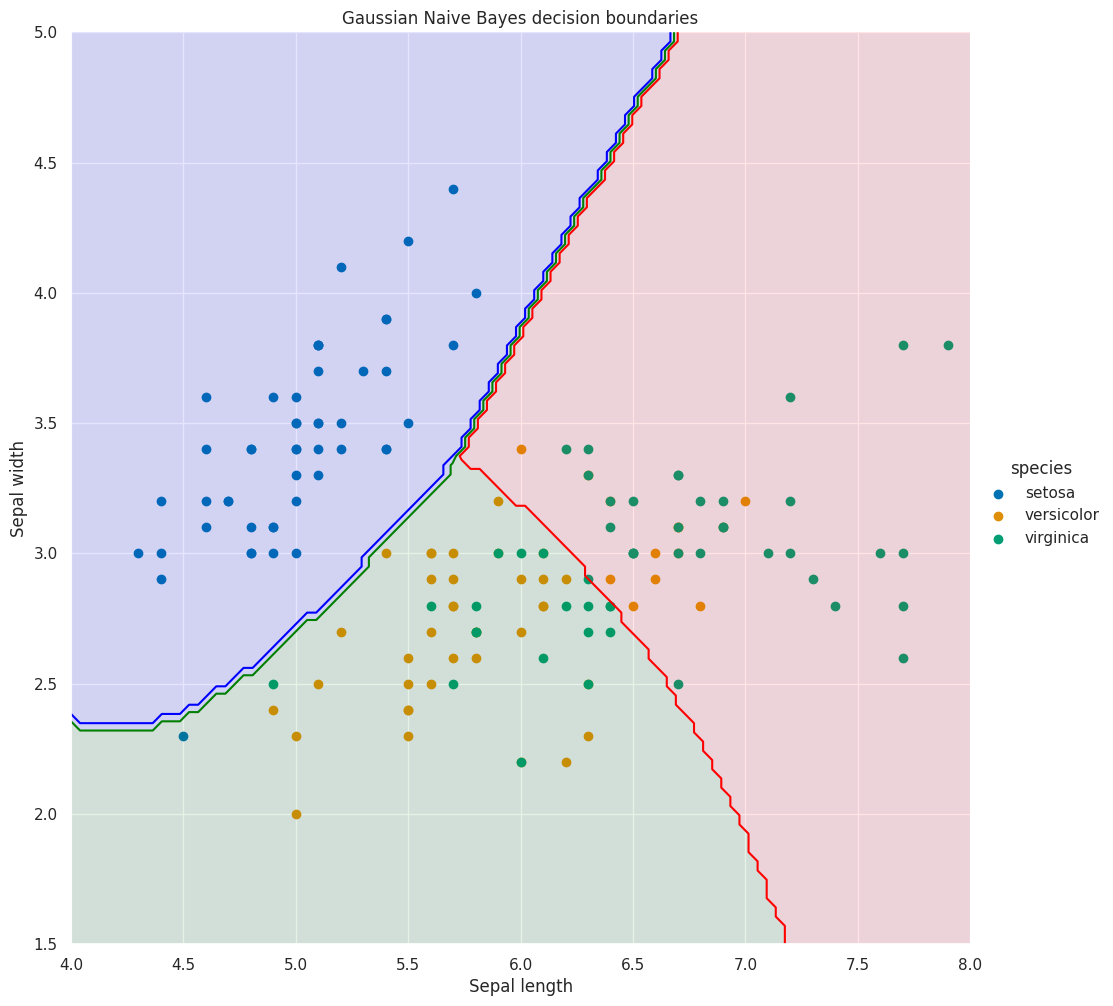

In [6]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data.values,y_labels)

# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

## Accuracy comparison of both implementations

In [7]:
#Numpy accuracy
y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )
display(np.mean(y_pred == y_labels))

#Sklearn accuracy
display(model_sk.score(X_data.values,y_labels))

0.78

0.78